# Problem Statement

Problem Statement
Customer retention is as crucial as customer acquisition when it comes to increasing revenue. Also we know,
it is much more expensive to sign in a new client than keeping an existing one.
It is advantageous for banks to know what leads a client towards the decision to leave the company. Also
churn prediction allows companies to develop loyalty programs and retention campaigns to keep as many
customers as possible so we have 3 tasks:
1. Analyze the customer churn rate for bank because it is useful to understand why the customers leave.
1. Predictive behavior modeling i.e. to classify if a customer is going to churn or not.
1. Choose the most reliable model that will attach a probability to the churn to make it easier for customer
service to target right customer in order to minimize their efforts to prevent churn.

# Import the Libraries

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Read the Dataset

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.shape

(10000, 14)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df['Balance'].skew() # left skew is negative value #right skew is a positive number

-0.14110871094154384

In [10]:
df['HasCrCard'].skew()

-0.9018115952400578

In [11]:
df['Age'].skew()

1.0113202630234552

In [12]:
df.duplicated().sum()

0

In [13]:
df_1= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [14]:
df_1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
df_1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
#Check for Imbalanced Dataset
df_1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Univariate Analysis: Boxplot

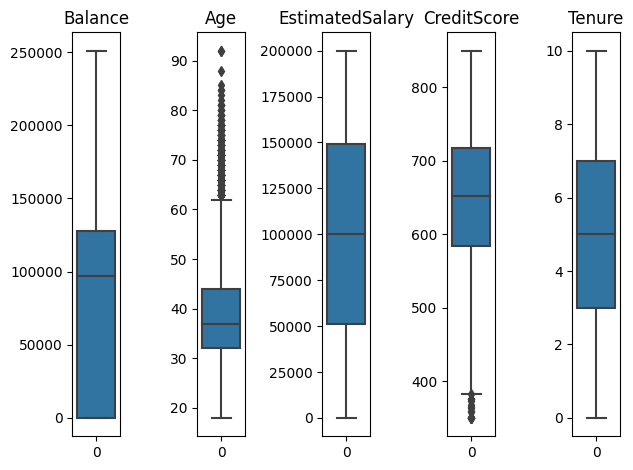

In [17]:
#box plot
columns_to_plot=['Balance','Age','EstimatedSalary','CreditScore','Tenure']
fig ,axes = plt.subplots(ncols=len(columns_to_plot))
for col,axis in zip(columns_to_plot,axes):
  sns.boxplot(data=df[col],ax=axis)
  axis.set_title(col)
  #fig.suptitle(col)
plt.tight_layout()
plt.show()

In [18]:
# as per above boxplot is not so suitable with binary variable like --'HasCrCard','IsActiveMember'

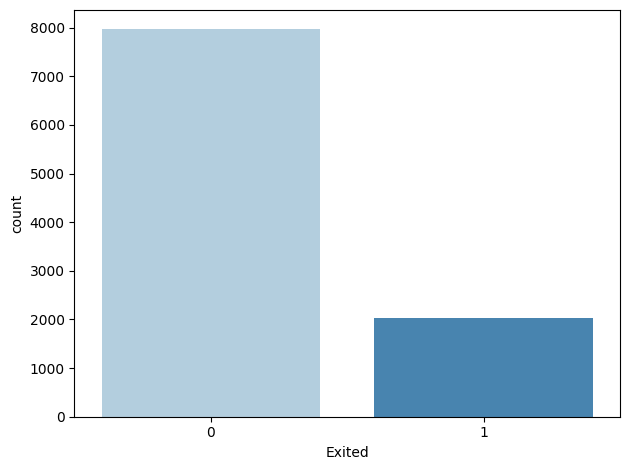

In [19]:
sns.countplot(x='Exited',data=df_1,palette='Blues')
plt.tight_layout()
plt.show()

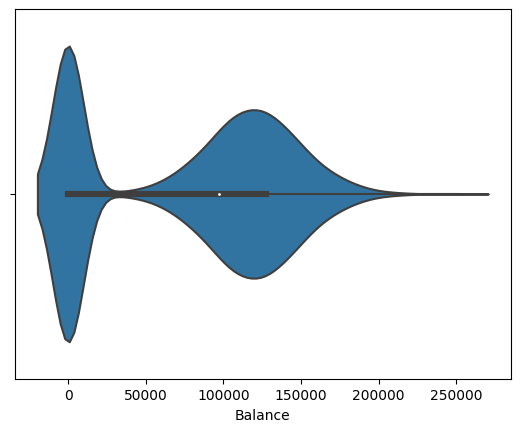

In [20]:
sns.violinplot(x='Balance',data=df_1)
plt.show()

In [21]:
conditions=[(df['EstimatedSalary']<=25000),(df['EstimatedSalary']>25000)&(df['EstimatedSalary']<=50000),
            (df['EstimatedSalary']>50000)&(df['EstimatedSalary']<=75000),(df['EstimatedSalary']>75000)&(df['EstimatedSalary']<=100000),
            (df['EstimatedSalary']>100000)&(df['EstimatedSalary']<=125000),(df['EstimatedSalary']>125000)&(df['EstimatedSalary']<=150000),
            (df['EstimatedSalary']>150000)&(df['EstimatedSalary']<=175000),(df['EstimatedSalary']>175000)&(df['EstimatedSalary']<=200000)]

values=['less than 25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000']

df['SalaryRange']=np.select(conditions,values)



In [22]:
df['SalaryRange'].value_counts()

125000-150000      1279
100000-125000      1276
50000-75000        1269
75000-100000       1268
175000-200000      1260
25000-50000        1236
less than 25000    1217
150000-175000      1195
Name: SalaryRange, dtype: int64

In [23]:
df['Age_1'] = np.log(df['Age']) #natural logarithm transform base e


<Axes: >

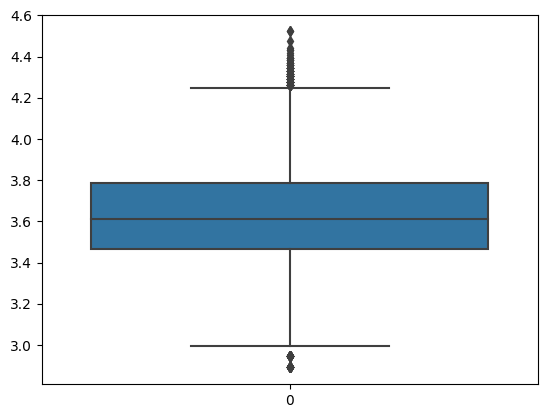

In [24]:
#Note : for log transform with base 10 ,we use np.log10()
 #similarly, for log transform with base 2 ,we use np.log2() when data pts are too low

sns.boxplot(data=df['Age_1'])

<Axes: >

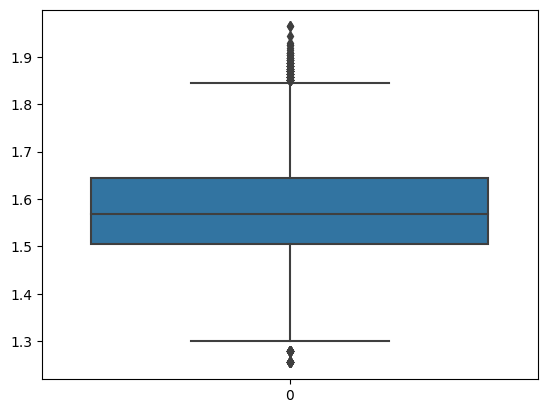

In [25]:
df['Age_2'] = np.log10(df['Age'])
sns.boxplot(data=df['Age_2'])

In [26]:
df['Age_2'].describe()

count    10000.000000
mean         1.575459
std          0.112221
min          1.255273
25%          1.505150
50%          1.568202
75%          1.643453
max          1.963788
Name: Age_2, dtype: float64

In [27]:
conditions=  [(df['Age_2']<=1.24),
              (df['Age_2']>1.24)&(df['Age_2']<=1.47),
              (df['Age_2']>1.47)&(df['Age_2']<=1.6),
              (df['Age_2']>1.6)&(df['Age_2']<=1.698),
              (df['Age_2']>1.698)&(df['Age_2']<=1.778),
              (df['Age_2']>1.778)&(df['Age_2']<=2)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['less than 18','18-30','30-40','40-50','50-60','60+']  #,'70-80','80+']

df['AgeRange']=np.select(conditions,values)

In [28]:
df['AgeRange'].value_counts()

30-40    4346
40-50    2618
18-30    1641
50-60     869
60+       526
Name: AgeRange, dtype: int64

# Multivariate Analysis

In [29]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_1,Age_2
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,0.001224,0.001224
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,0.008777,0.008777
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.006507,-0.006507
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.982680,0.982680
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.011199,-0.011199
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.030598,0.030598
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.030025,-0.030025
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.011659,-0.011659
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.064891,0.064891
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.006253,-0.006253


<ipython-input-30-eaae859e1552>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,yticklabels=True,cbar=True,cmap='coolwarm')


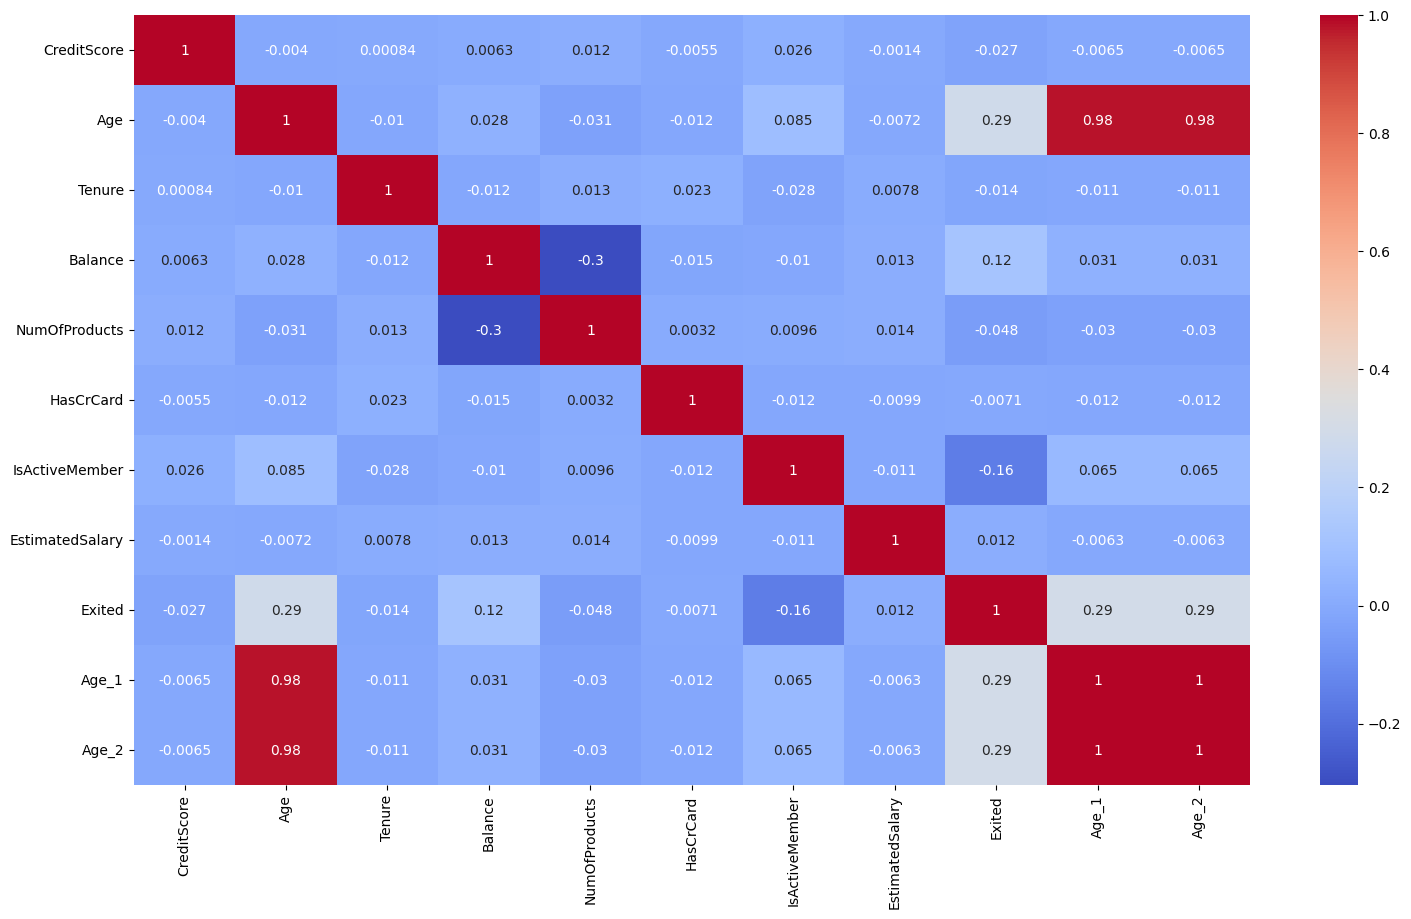

In [30]:
df.drop(['RowNumber',	'CustomerId'],axis=1,inplace=True)
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,yticklabels=True,cbar=True,cmap='coolwarm')
plt.show()

In [31]:
df_1.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Bivariate Analysis: Exited Vs Other features

In [32]:
df_1['Age_2'] = np.log10(df['Age'])
conditions1=  [(df_1['Age_2']<=1.24),
              (df_1['Age_2']>1.24)&(df_1['Age_2']<=1.47),
              (df_1['Age_2']>1.47)&(df_1['Age_2']<=1.6),
              (df_1['Age_2']>1.6)&(df_1['Age_2']<=1.698),
              (df_1['Age_2']>1.698)&(df_1['Age_2']<=1.778),
              (df_1['Age_2']>1.778)&(df_1['Age_2']<=2)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['less than 18','18-30','30-40','40-50','50-60','60+']  #,'70-80','80+']

df_1['AgeRange']=np.select(conditions1,values)

conditions2= [(df_1['Balance']<=50000),(df_1['Balance']>50000)&(df_1['Balance']<=100000),
              (df_1['Balance']>100000)&(df_1['Balance']<=150000),(df_1['Balance']>150000)&(df_1['Balance']<=200000),
              (df_1['Balance']>200000)&(df_1['Balance']<=250000),(df_1['Balance']>250000)]

values=['less than 50000','50000-100000','100000-150000','150000-200000','200000-250000','250000+']

df_1['BalanceRange']=np.select(conditions2,values)

conditions3=[(df_1['EstimatedSalary']<=25000),(df_1['EstimatedSalary']>25000)&(df_1['EstimatedSalary']<=50000),
            (df_1['EstimatedSalary']>50000)&(df_1['EstimatedSalary']<=75000),(df_1['EstimatedSalary']>75000)&(df_1['EstimatedSalary']<=100000),
            (df_1['EstimatedSalary']>100000)&(df_1['EstimatedSalary']<=125000),(df_1['EstimatedSalary']>125000)&(df_1['EstimatedSalary']<=150000),
            (df_1['EstimatedSalary']>150000)&(df_1['EstimatedSalary']<=175000),(df_1['EstimatedSalary']>175000)&(df_1['EstimatedSalary']<=200000)]

values=['less than 25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000']

df_1['SalaryRange']=np.select(conditions3,values)

#df_1['CreditScore']=np.select(conditions,values)

conditions4=[(df_1['CreditScore']>350)&(df_1['CreditScore']<=450),
            (df_1['CreditScore']>450)&(df_1['CreditScore']<=550),(df_1['CreditScore']>550)&(df_1['CreditScore']<=650),
            (df_1['CreditScore']>650)&(df_1['CreditScore']<=750),(df_1['CreditScore']>750)&(df_1['CreditScore']<=850)]

values=['350-450','450-550','550-650','650-750','750-850']

df_1['CreditScoreRange']=np.select(conditions4,values)

In [33]:
df_1= df_1.drop(['Age','Balance','EstimatedSalary', 'Age_2','CreditScore'],axis=1)
df_1.columns

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'AgeRange', 'BalanceRange', 'SalaryRange',
       'CreditScoreRange'],
      dtype='object')

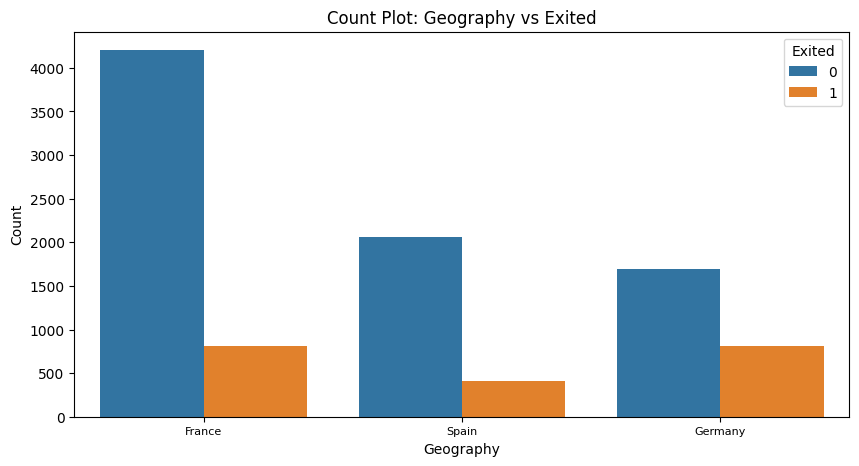

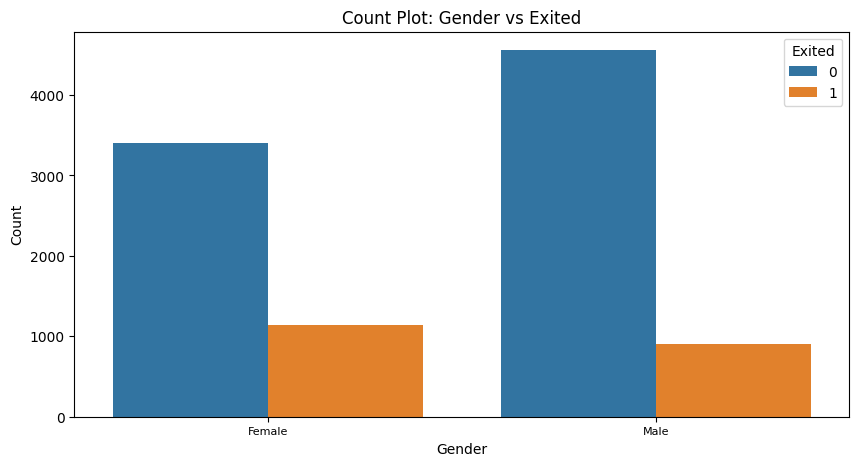

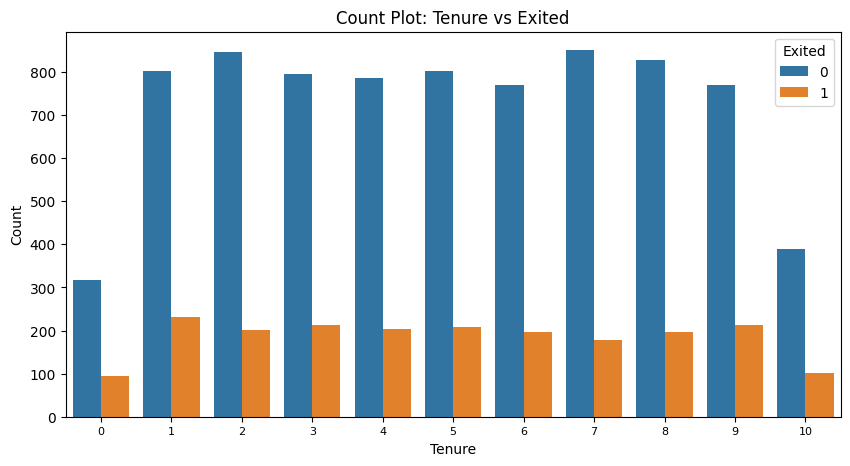

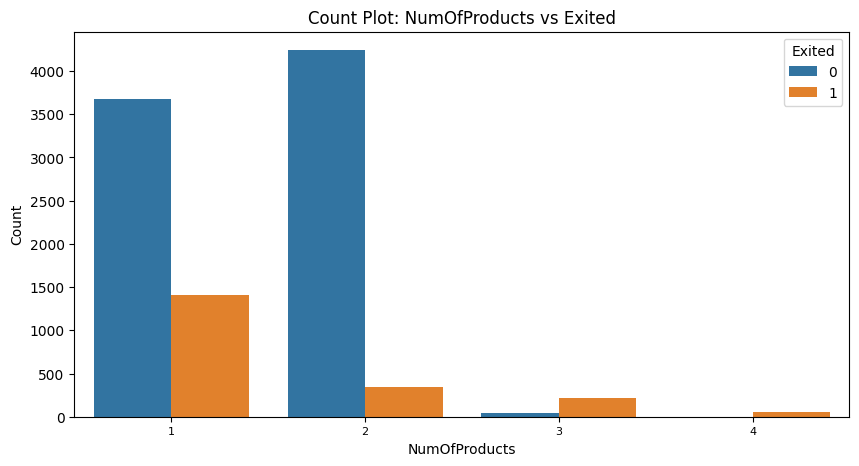

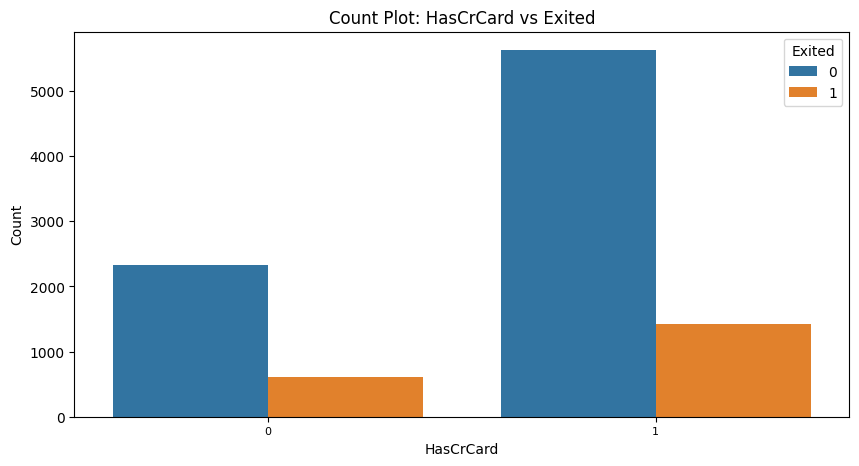

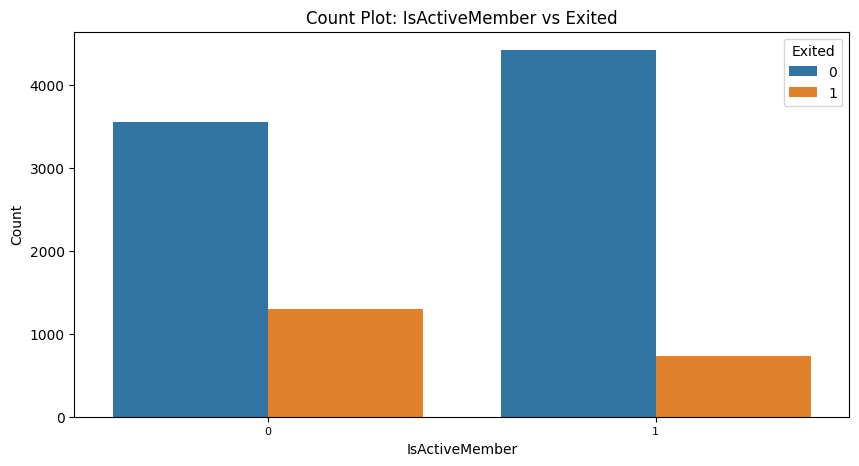

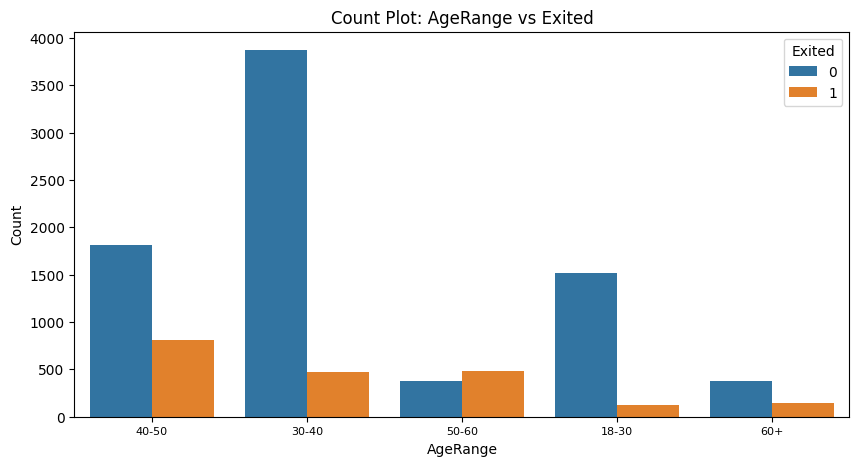

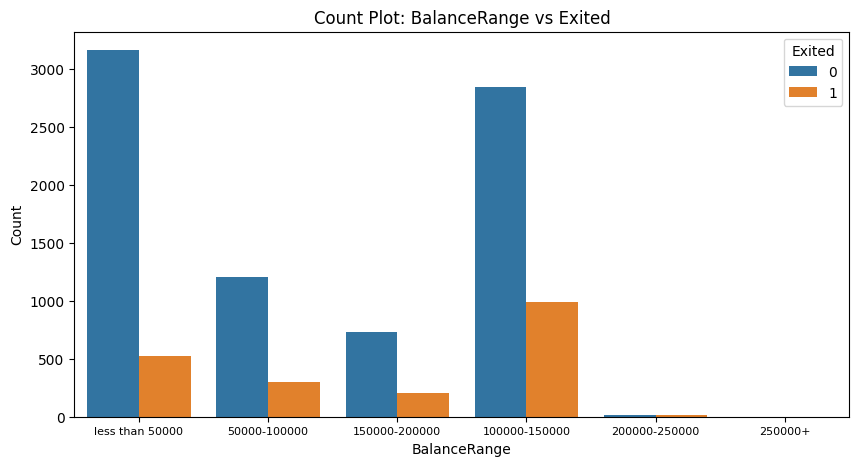

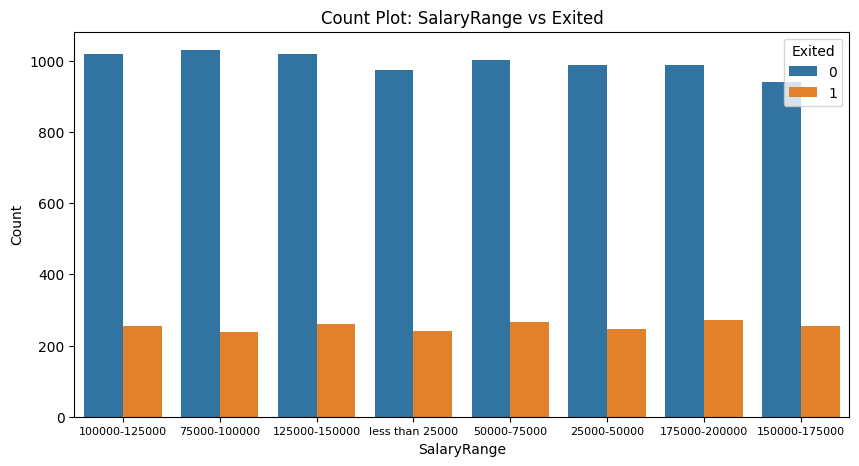

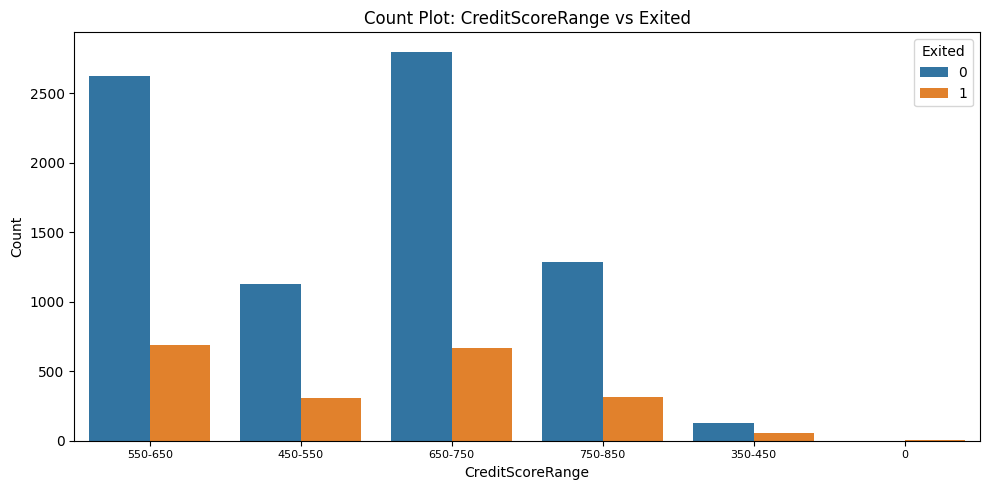

In [34]:
#columns_to_plot=['Balance','Age','EstimatedSalary','CreditScore','NumOfProducts','Tenure','HasCrCard','IsActiveMember']
target_variable = 'Exited'
independent_variables = [col for col in df_1.columns if col != target_variable]
for i in independent_variables:
  fig,axarr=plt.subplots(figsize=(10,5))
  sns.countplot(data=df_1, x=i, hue=target_variable, ax=axarr)
  plt.title(f'Count Plot: {i} vs {target_variable}')
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.xticks(size=8)
plt.tight_layout()
plt.show()

In [35]:
df_1['SalaryRange'].where(df_1['Exited']==1).value_counts()

175000-200000      273
50000-75000        266
125000-150000      261
100000-125000      256
150000-175000      254
25000-50000        247
less than 25000    242
75000-100000       238
Name: SalaryRange, dtype: int64

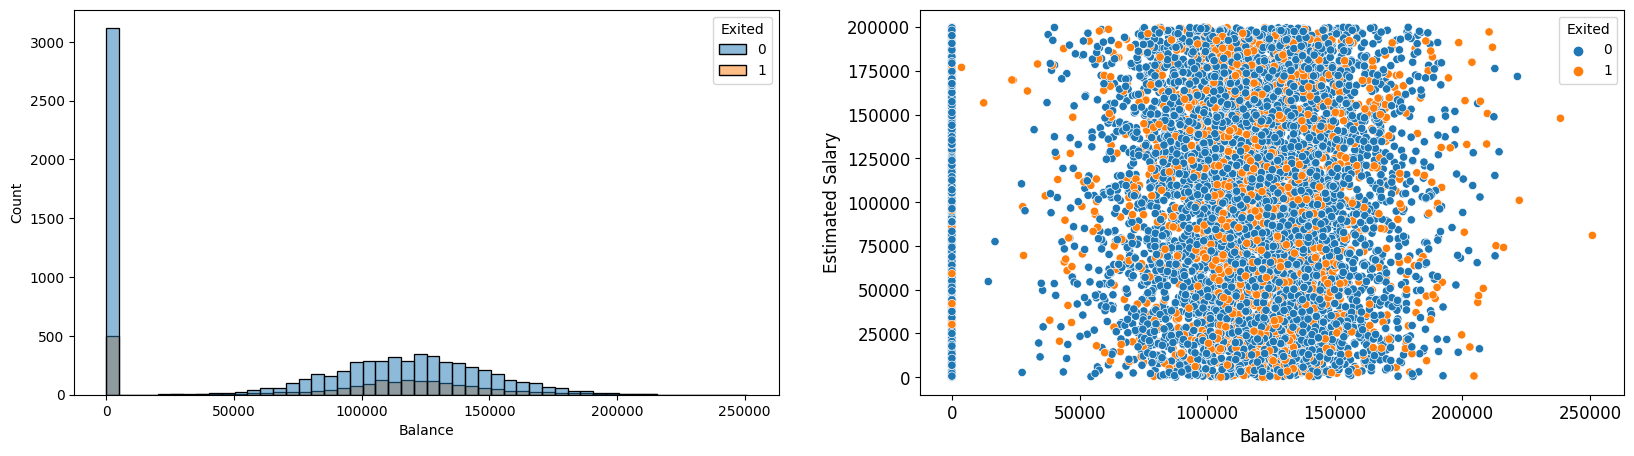

In [36]:
fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Balance',hue='Exited',bins=50,ax = axarr[0])
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Estimated Salary',size=12)
sns.scatterplot(data=df,x='Balance',y='EstimatedSalary',hue='Exited',ax=axarr[1])
plt.show()

# Bivariate Analysis of Independent variables

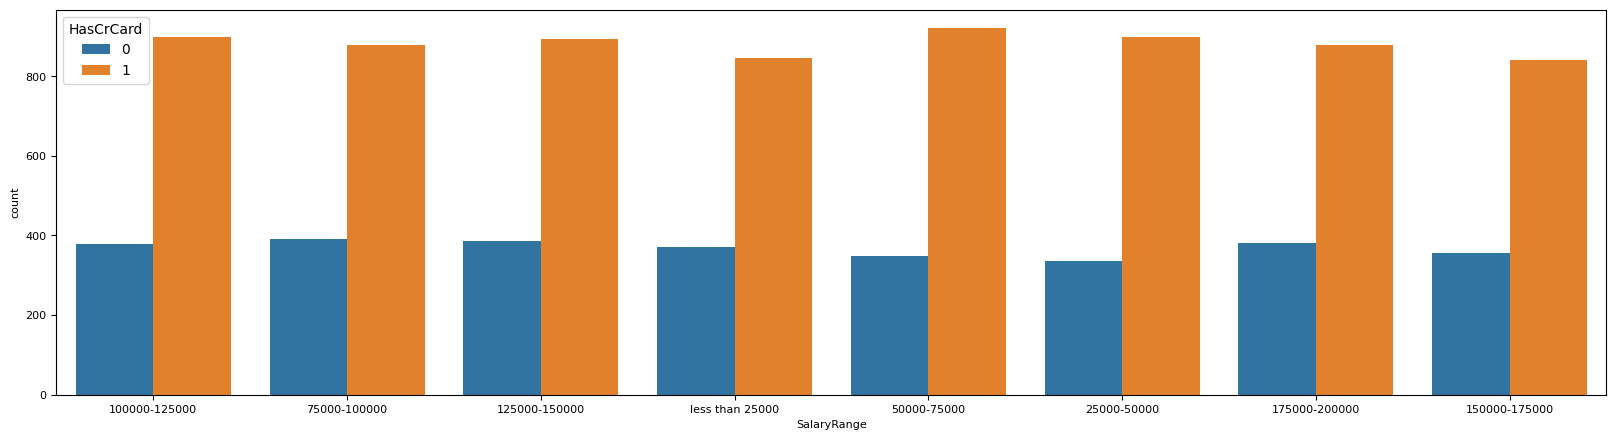

In [37]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=8)
plt.xlabel('Salary Ranges',size=8)
plt.yticks(size=8)
plt.ylabel('Count of Salary Range of customers having Credit card',size=8)
sns.countplot(data=df,x='SalaryRange',hue='HasCrCard',ax=axarr) # hue is for bivariate comparison
plt.show()

Persons with salary range between 100000 to 200000 tend to have credit card compared to those with lower salaries.
For income group 50000-75000, The percentage of persons holding CC is less compared to others.(36.8%)
The income does not seem to have any effect on hascreditcard variable.
All income groups almost have similar proportion of people holding credit card.

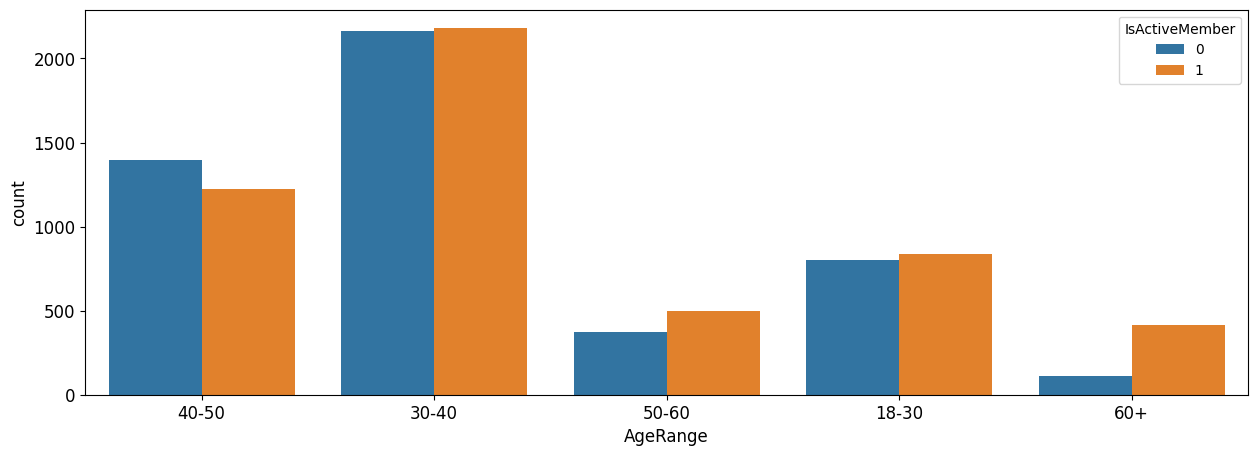

In [38]:
fig,axarr=plt.subplots(figsize=(15,5))
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of customers Active or Not',size=12)
sns.countplot(data=df,x='AgeRange',hue='IsActiveMember',ax=axarr) # hue is for bivariate comparison
plt.show()

In Age Range "40-50" , There are more inactive members than the active ones.
In Age Range "30-40", has almost similar number of active and inactive members
The Active members are increasing as Age increases

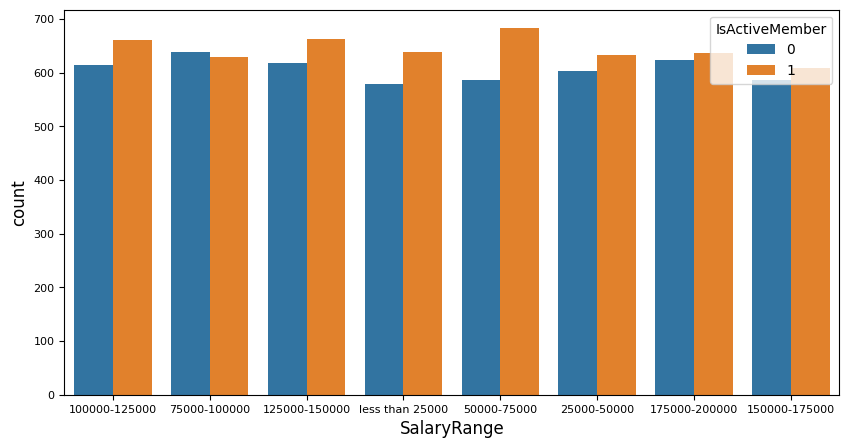

In [39]:
fig,axarr=plt.subplots(figsize=(10,5))
plt.xticks(size=8)
plt.xlabel('Salary Ranges',size=12)
plt.yticks(size=8)
plt.ylabel('Count of Salary Range of Active customers ',size=12)
sns.countplot(data=df,x='SalaryRange',hue='IsActiveMember',ax=axarr) # hue is for bivariate comparison
plt.show()

In [40]:
conditions=[(df['Balance']<=50000),(df['Balance']>50000)&(df['Balance']<=100000),
            (df['Balance']>100000)&(df['Balance']<=150000),(df['Balance']>150000)&(df['Balance']<=200000),
            (df['Balance']>200000)&(df['Balance']<=250000),(df['Balance']>250000)]

values=['less than 50000','50000-100000','100000-150000','150000-200000','200000-250000','250000+']

df['BalanceRange']=np.select(conditions,values)

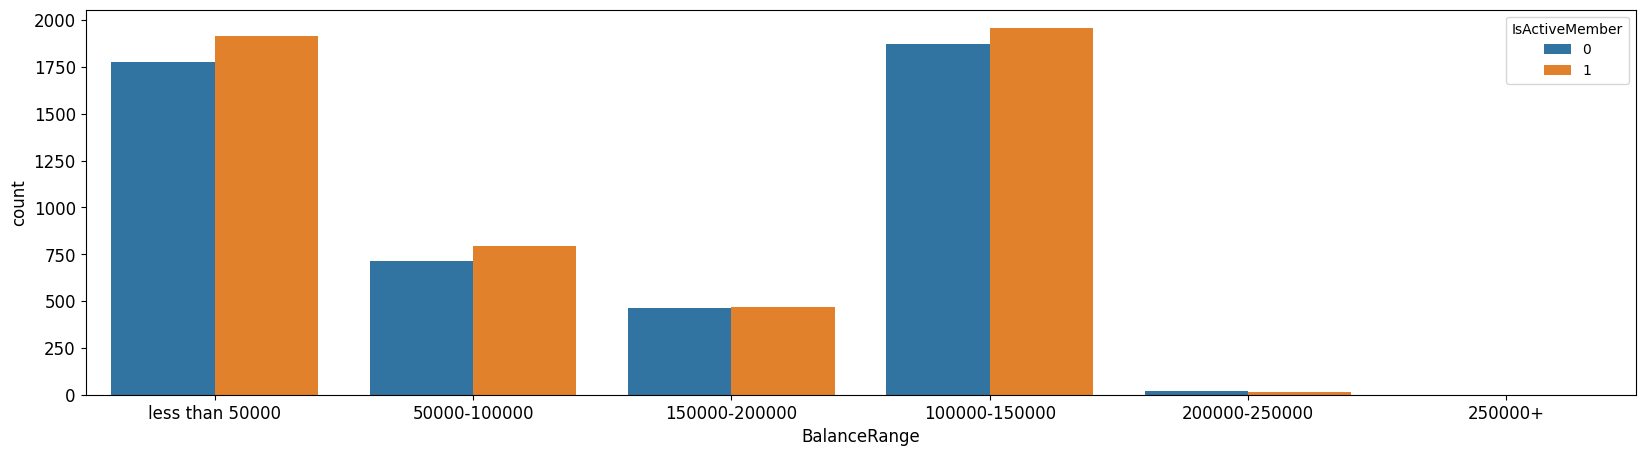

In [41]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Balance Range of Active customers ',size=12)
sns.countplot(data=df,x='BalanceRange',hue='IsActiveMember',ax=axarr) # hue is for bivariate comparison
plt.show()

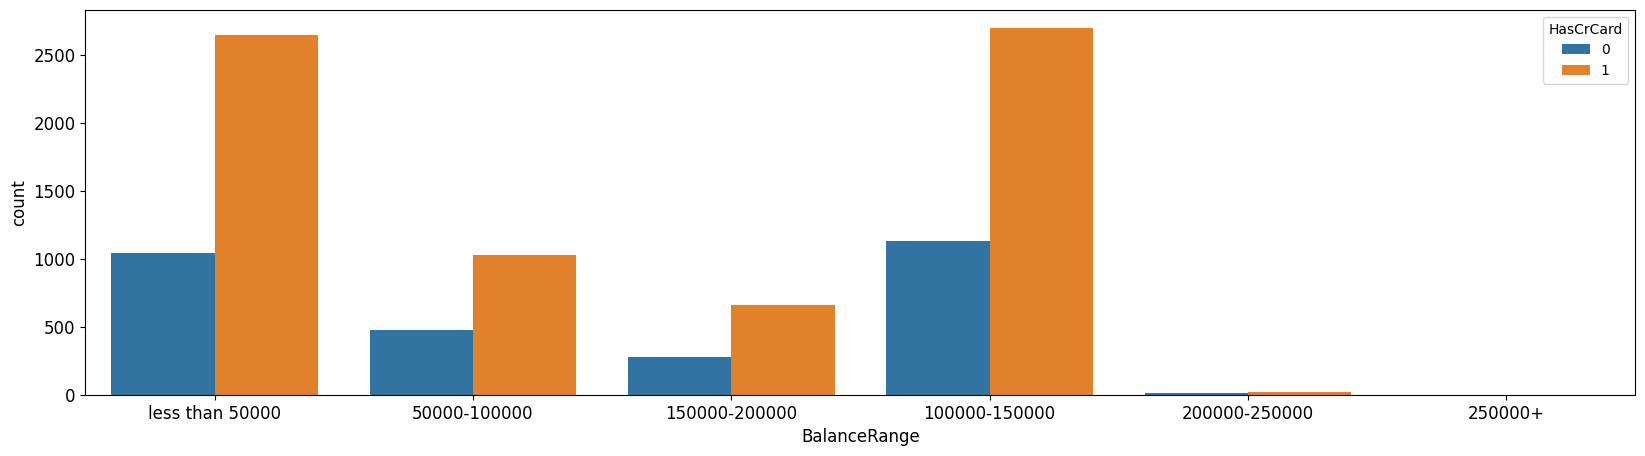

In [42]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Balance Range of customers using credit card',size=12)
sns.countplot(data=df,x='BalanceRange',hue='HasCrCard',ax=axarr) # hue is for bivariate comparison
plt.show()

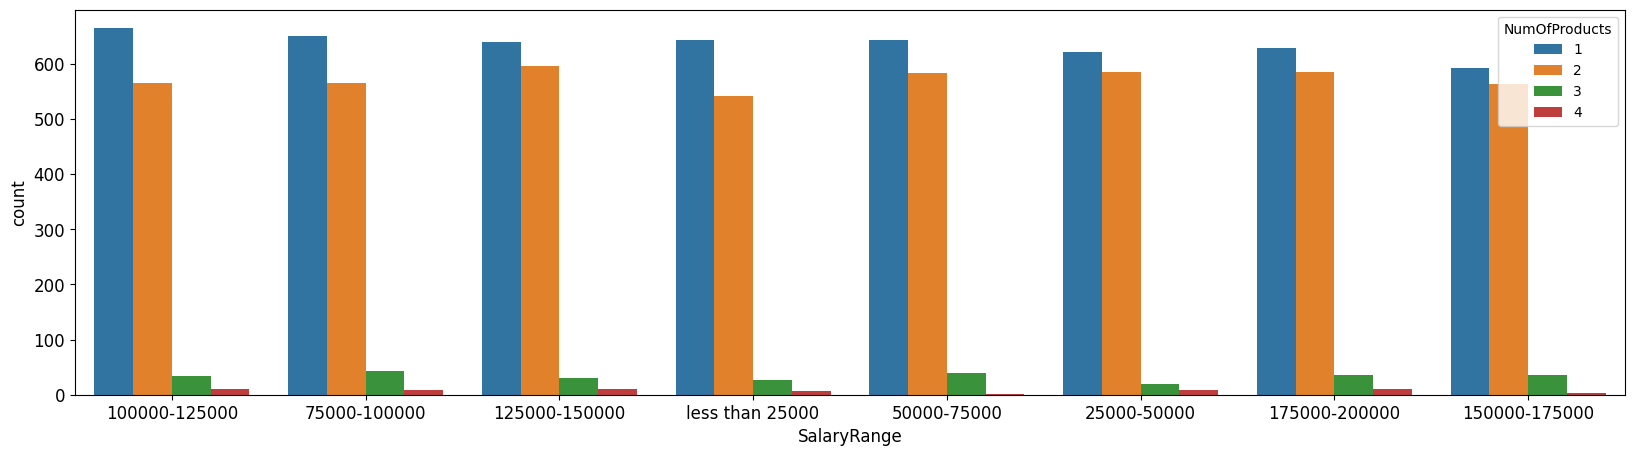

In [43]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Salary',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Salary Range of customers Using Products',size=12)
sns.countplot(data=df,x='SalaryRange',hue='NumOfProducts',ax=axarr) # hue is for bivariate comparison
plt.show()

More number of people from Salary range "less than 50000" and "100000-150000" are buying the maximum products amongst the rest.

However , people in Salary range "less than 50000" use product 2 while people in Salary range "100000-150000" are prefering product 1.

Overall , Products 1 and 2 are popular products amongst the people

In [44]:
df2=df.where(df['NumOfProducts']==1).reset_index(drop=True)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          5084 non-null   object 
 1   CreditScore      5084 non-null   float64
 2   Geography        5084 non-null   object 
 3   Gender           5084 non-null   object 
 4   Age              5084 non-null   float64
 5   Tenure           5084 non-null   float64
 6   Balance          5084 non-null   float64
 7   NumOfProducts    5084 non-null   float64
 8   HasCrCard        5084 non-null   float64
 9   IsActiveMember   5084 non-null   float64
 10  EstimatedSalary  5084 non-null   float64
 11  Exited           5084 non-null   float64
 12  SalaryRange      5084 non-null   object 
 13  Age_1            5084 non-null   float64
 14  Age_2            5084 non-null   float64
 15  AgeRange         5084 non-null   object 
 16  BalanceRange     5084 non-null   object 
dtypes: float64(11

In [46]:
df2.where(df2['HasCrCard']==1).sum()

<ipython-input-46-286bf437ea7d>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.where(df2['HasCrCard']==1).sum()


CreditScore        2.322770e+06
Age                1.414930e+05
Tenure             1.795200e+04
Balance            3.495524e+08
NumOfProducts      3.578000e+03
HasCrCard          3.578000e+03
IsActiveMember     1.775000e+03
EstimatedSalary    3.544908e+08
Exited             9.910000e+02
Age_1              1.303576e+04
Age_2              5.661358e+03
dtype: float64

# Extras

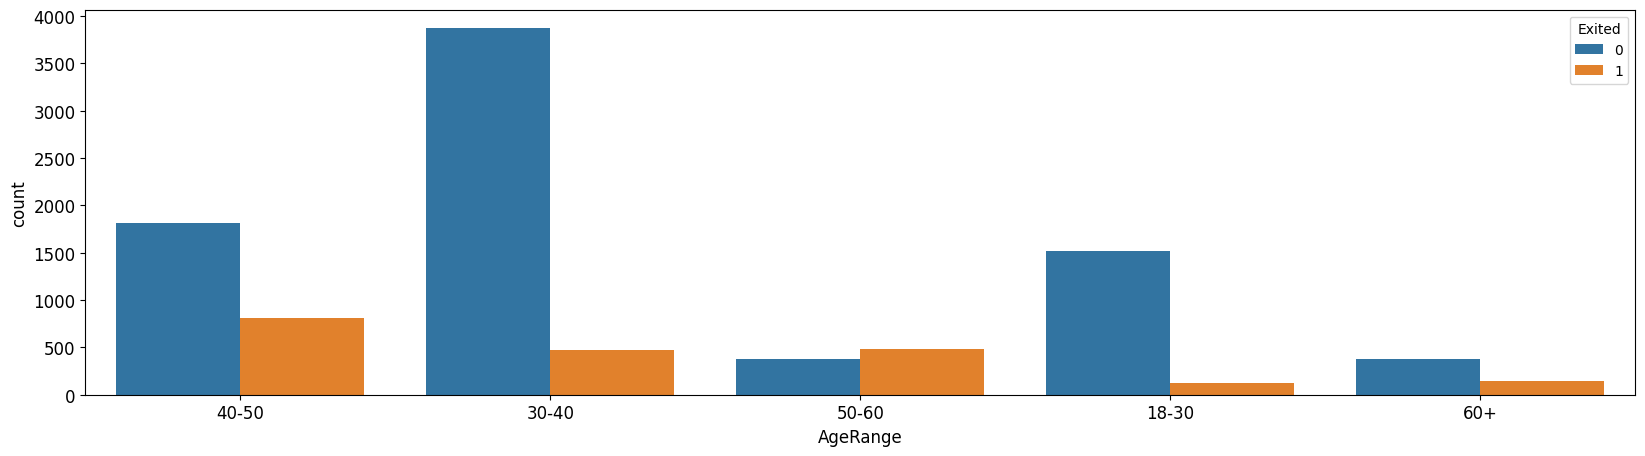

In [ ]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of customers exited and non-exited',size=12)
sns.countplot(data=df,x='AgeRange',hue='Exited',ax=axarr) # hue is for bivariate comparison
plt.show()



In [ ]:
(df2['HasCrCard']==1).sum()

3578

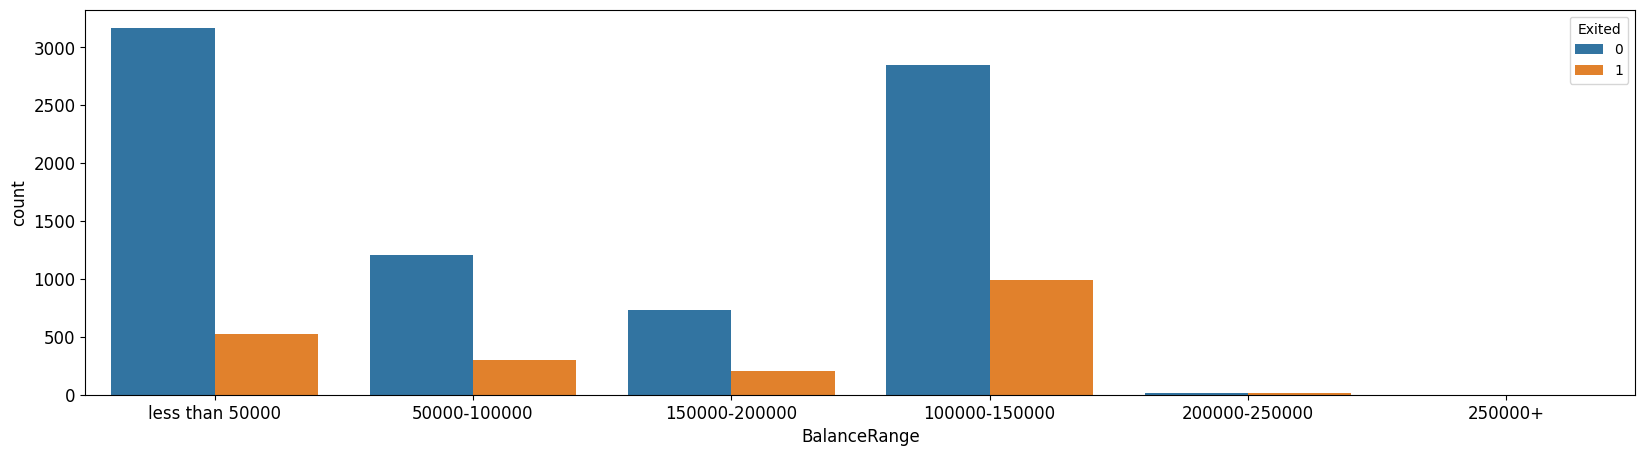

In [ ]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Balance Range of customers for exited',size=12)
sns.countplot(data=df,x='BalanceRange',hue='Exited',ax=axarr) # hue is for bivariate comparison
plt.show()

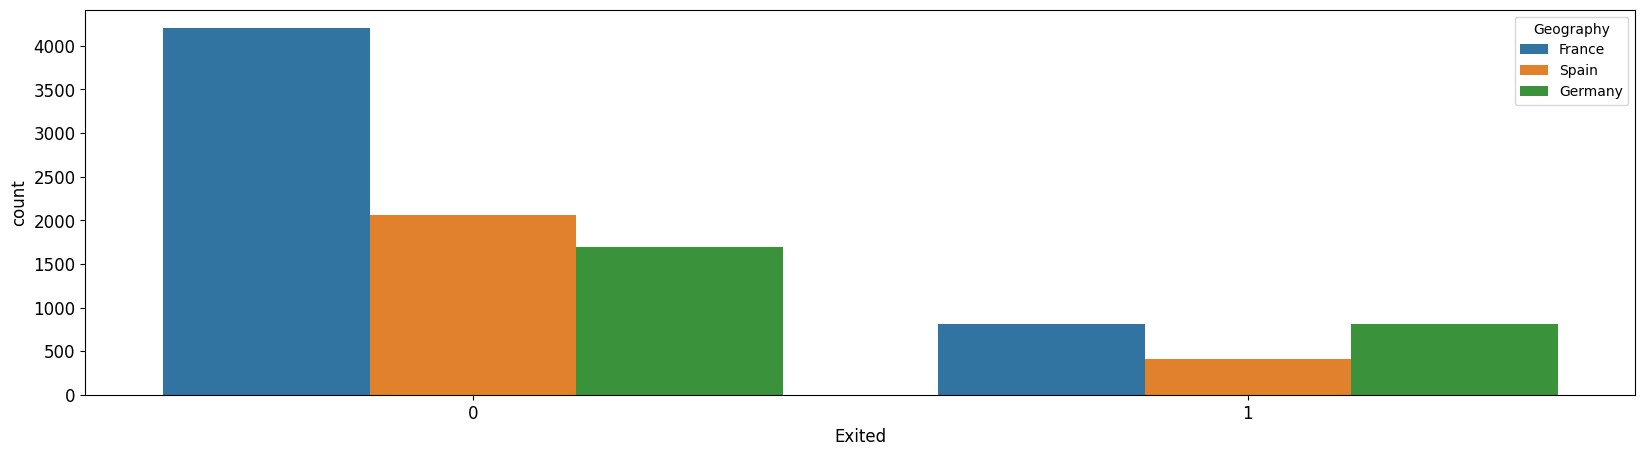

In [ ]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Exited',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers based on Geography who exited and not exited ',size=12)
sns.countplot(data=df,x='Exited',hue='Geography',ax=axarr) # hue is for bivariate comparison
plt.show()

Comparison based on Geograpy for the people that are retained and exited.
It is observed that there are more exits in germany based on number of total customers.Almost 50% attrition in germany

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df_geography=df.groupby(['Geography', 'Exited']).size()

In [ ]:
df_geography

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64

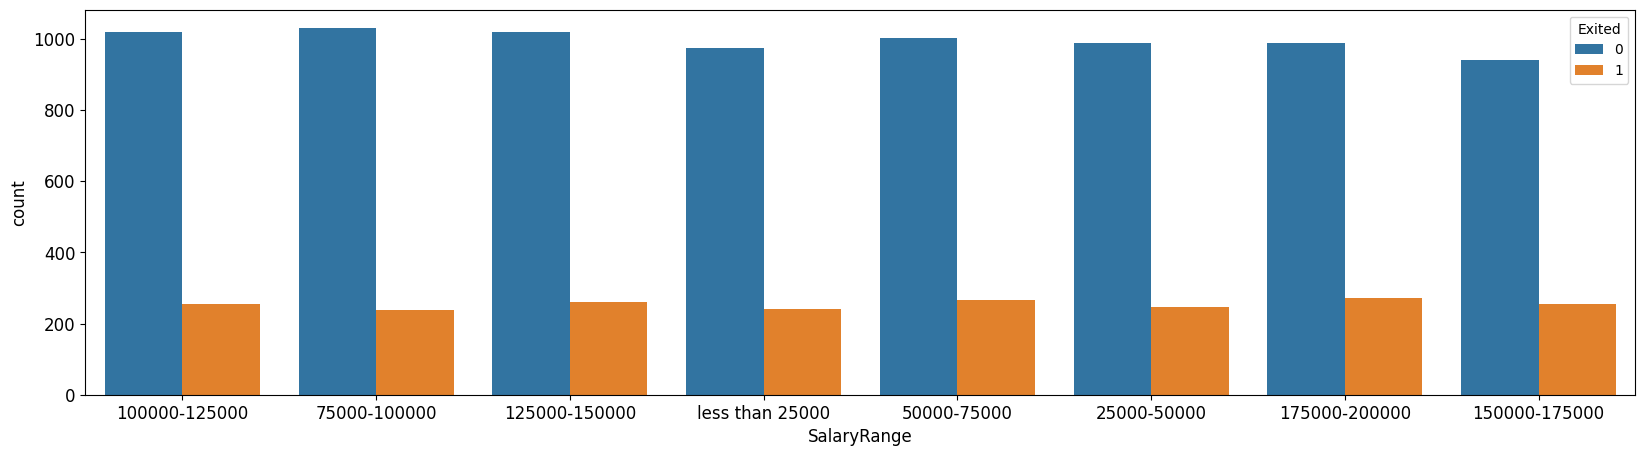

In [ ]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Salary Ranges',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Salary Range of customers exited/non-exited',size=12)
sns.countplot(data=df,x='SalaryRange',hue='Exited',ax=axarr) # hue is for bivariate comparison
plt.show()

In [ ]:
df_Tenure=df.groupby(['Tenure', 'Exited']).size()

In [ ]:
df_Tenure

Tenure  Exited
0       0         318
        1          95
1       0         803
        1         232
2       0         847
        1         201
3       0         796
        1         213
4       0         786
        1         203
5       0         803
        1         209
6       0         771
        1         196
7       0         851
        1         177
8       0         828
        1         197
9       0         771
        1         213
10      0         389
        1         101
dtype: int64

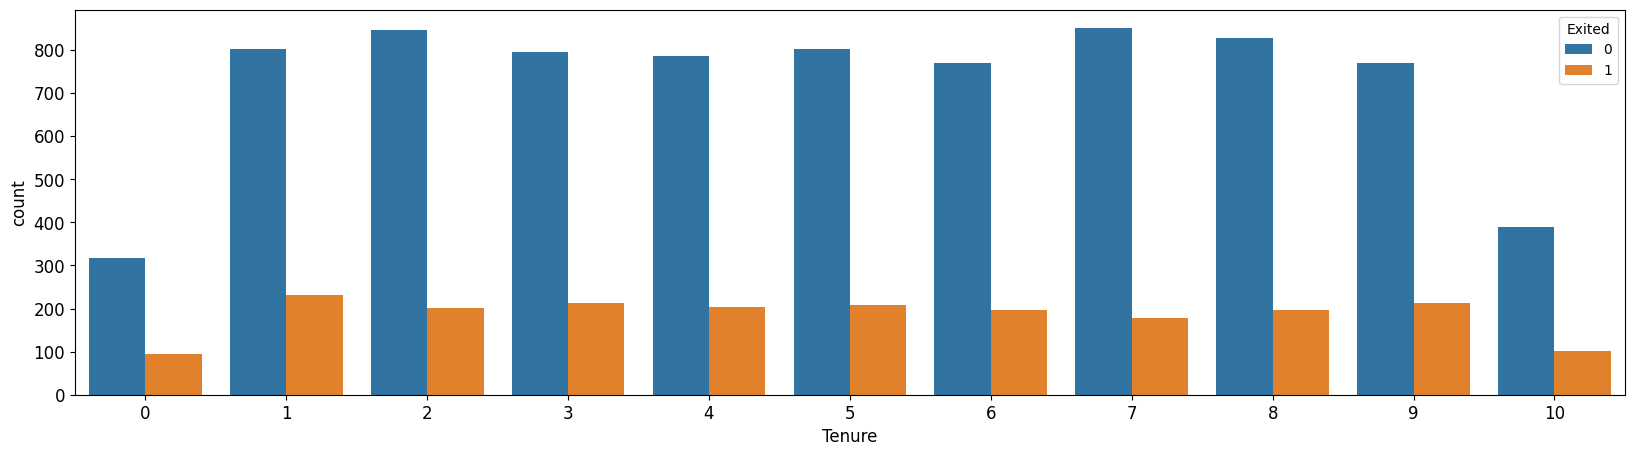

In [ ]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Tenure',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers attritioned based on Tenure ',size=12)
sns.countplot(data=df,x='Tenure',hue='Exited',ax=axarr) # hue is for bivariate comparison
plt.show()

Exit is higher after 1 year (23%) and after 9 years (21.6%)

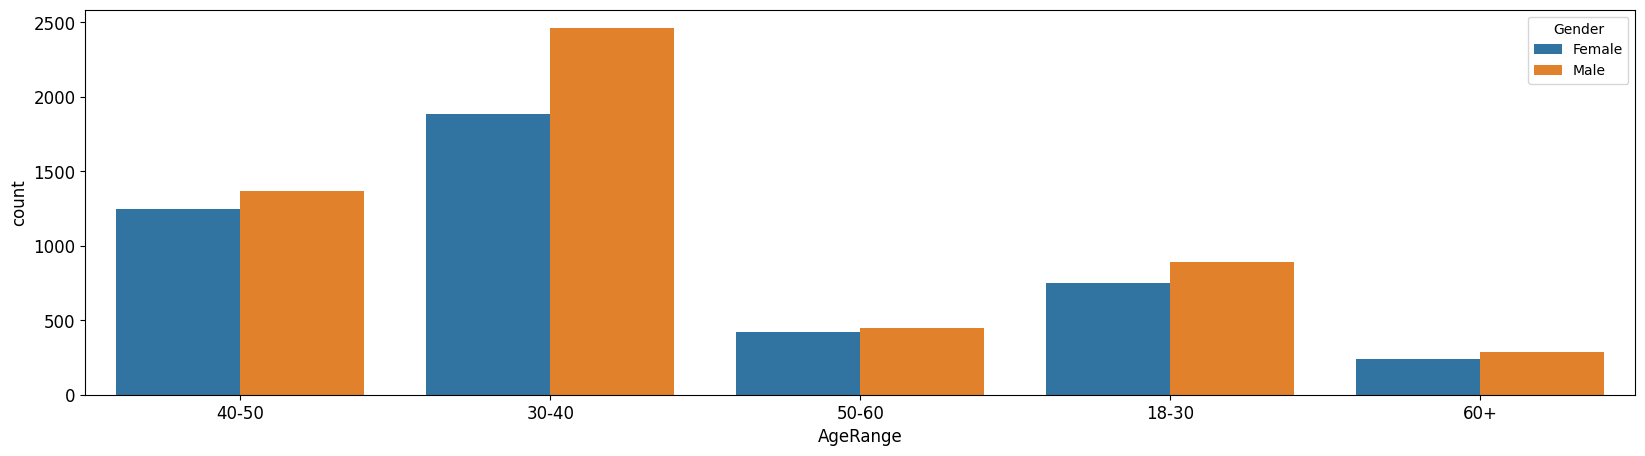

In [ ]:
fig,axarr=plt.subplots(figsize=(20,5))
plt.xticks(size=12)
plt.xlabel('Gender',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Gender of customers for exited',size=12)
sns.countplot(data=df,x='AgeRange',hue='Gender',ax=axarr) # hue is for bivariate comparison
plt.show()

# Business Questions Answered:
Questionnaire:
1)	What is the ratio of female to male exits? 0.736

2)	How is the geography impacting the number of exits? There are more number of exits in France, Germany.

3)	What age range has the maximum impact on number of exits? 30-40

4)	Does having credit card affecting the number of exits? Ratio of exits is slightly more with people having credit card. But credit card does not seem to have much impact on exits

5)	Are there more exits when the member is Active or not? There are clearly more exits when member is Inactive

6)	At what tenure range are there maximum exits?1,3,5,9 has max exits

7)	Is Balance of the account holder affecting the exit? There are maximum exits when Balance is less than 50000 and when balance range is between 100000 and 150000

8)	What is the salary range count of people who exited? Wrong question

9)	What is the maximum number of products availed by account holders? 4

10)	Who are the people exited based on credit score range? Are people with good score exiting.Yes there maximum exits with credit scores between 550-750

11)	What is maximum age range of female and male accounts? 30-40

12)	What factors are affecting exits by a customer? 30-40 Age range, low Balance, Non-Active Member, Gender, Tenure, Geography.


# Feature Selection

In [47]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.datasets import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


In [72]:
df.columns
df_final=df.drop(['Surname','SalaryRange', 'Age_1', 'Age_2','AgeRange', 'BalanceRange'],axis=1)
df_final.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [48]:
df_1.columns

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'AgeRange', 'BalanceRange', 'SalaryRange',
       'CreditScoreRange'],
      dtype='object')

In [73]:
# Differiating numerical and categorical features
numeric_features = [feature for feature in df_final.columns if df_final[feature].dtype != 'O']
categorical_features = [feature for feature in df_final.columns if df_final[feature].dtype == 'O']

In [77]:
numeric_features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [78]:
categorical_features

['Geography', 'Gender']

In [79]:
#Encoding the categorical data
df_final['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [84]:
df_final = pd.get_dummies(df_final, drop_first=True) # To avoid Dummy variable trap
df_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [85]:
df_final['Exited'].value_counts()      #imbalanced dataset

0    7963
1    2037
Name: Exited, dtype: int64

In [220]:
# Splitting the independent and dependent variables in X and Y
x = df_final.drop(['Exited'], axis=1)
y = df_final['Exited']

In [221]:
#Handling Imbalanced dataset using SMOTE technique (oversampling technique SMOTE- creating synthetic datapoints by randomly increasing minority class by replicating them) Note: when using under sampling we might lose valuable data
from imblearn.over_sampling import SMOTE
x_res,y_res = SMOTE().fit_resample(x,y)


In [222]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Train test Split

In [223]:
# Splitting the data into train set and test set
from  sklearn.model_selection import train_test_split

In [224]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Feature Scaling

In [225]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [226]:
X_train


array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# Logistic regression

In [227]:
# Since its a classification problem we use Logistic regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [228]:
y_pred1 = log.predict(X_test)

In [229]:
from sklearn.metrics import accuracy_score

In [230]:
accuracy_score(Y_test,y_pred1)

0.811

In [231]:
#since we have imbalanced datasets we check for other accuracy parameters as well
from sklearn.metrics import precision_score,recall_score,f1_score

In [232]:
precision_score(Y_test,y_pred1) # TP/(FP+TP)

0.5524475524475524

In [233]:
recall_score(Y_test,y_pred1)  #TP/(TP+FN)

0.2010178117048346

In [234]:
f1_score(Y_test,y_pred1)

0.2947761194029851

# SVC

In [235]:
#SVC
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,Y_train)

SVC()

In [236]:
y_pred2 = svm.predict(X_test)

In [237]:
accuracy_score(Y_test,y_pred2)

0.856

In [238]:
precision_score(Y_test,y_pred2) # TP/(FP+TP)

0.7692307692307693

In [239]:
recall_score(Y_test,y_pred2)  #TP/(TP+FN)

0.3816793893129771

In [240]:
f1_score(Y_test,y_pred2)

0.5102040816326531

# knn

In [241]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [242]:
knn = KNeighborsClassifier()

In [243]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [244]:
y_pred3 = knn.predict(X_test)

In [245]:
accuracy_score(Y_test,y_pred3)

0.83

In [249]:
precision_score(Y_test,y_pred3) # TP/(FP+TP)

0.6108786610878661

In [247]:
recall_score(Y_test,y_pred3)  #TP/(TP+FN)

0.37150127226463103

In [248]:
f1_score(Y_test,y_pred3)

0.46202531645569617

# Decision Tree Classifier

In [250]:
#Decison Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [251]:
dt = DecisionTreeClassifier()

In [252]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [253]:
y_pred4 = dt.predict(X_test)

In [254]:
accuracy_score(Y_test,y_pred4)

0.778

In [255]:
precision_score(Y_test,y_pred4) # TP/(FP+TP)

0.4421768707482993

In [256]:
recall_score(Y_test,y_pred4)  #TP/(TP+FN)

0.4961832061068702

In [257]:
f1_score(Y_test,y_pred4)

0.4676258992805755

# Random Forest Classifier

In [258]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [259]:
rf = RandomForestClassifier()

In [260]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [261]:
y_pred5 = rf.predict(X_test)

In [262]:
accuracy_score(Y_test,y_pred5)

0.864

In [263]:
precision_score(Y_test,y_pred5) # TP/(FP+TP)

0.7410358565737052

In [264]:
recall_score(Y_test,y_pred5)  #TP/(TP+FN)

0.4732824427480916

In [265]:
f1_score(Y_test,y_pred5)

0.5776397515527951

# Gradient Boosting Classifier

In [266]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [267]:
gbc = GradientBoostingClassifier()

In [268]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [269]:
y_pred6 = gbc.predict(X_test)

In [270]:
accuracy_score(Y_test,y_pred6)

0.8675

In [271]:
precision_score(Y_test,y_pred6) # TP/(FP+TP)

0.75

In [272]:
recall_score(Y_test,y_pred6)  #TP/(TP+FN)

0.48854961832061067

In [273]:
f1_score(Y_test,y_pred6)

0.5916795069337443

# BEST SCORE

In [274]:
#Final - Accuracy Score
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(Y_test,y_pred1),
                                  accuracy_score(Y_test,y_pred2),
                                  accuracy_score(Y_test,y_pred3),
                                  accuracy_score(Y_test,y_pred4),
                                  accuracy_score(Y_test,y_pred5),
                                  accuracy_score(Y_test,y_pred6)]})

In [275]:
final_data

,Models,ACC
0,LR,0.8110
1,SVC,0.8560
2,KNN,0.8300
3,DT,0.7780
4,RF,0.8640
5,GBC,0.8675


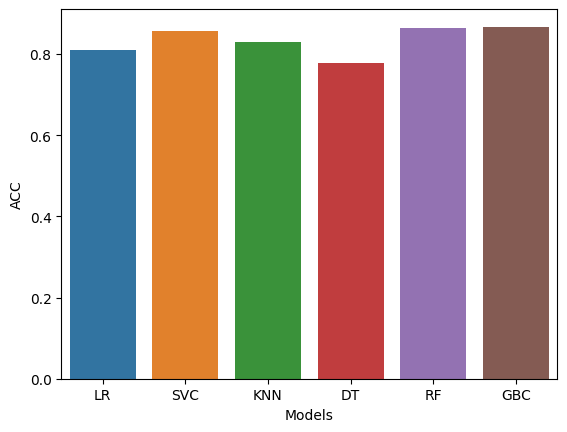

In [276]:
#Visualise the Accuaracy DataFrame
sns.barplot(x='Models', y='ACC', data=final_data)
plt.show()

In [277]:
#Final - precision Score
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'PRECISION':[precision_score(Y_test,y_pred1),
                                  precision_score(Y_test,y_pred2),
                                  precision_score(Y_test,y_pred3),
                                  precision_score(Y_test,y_pred4),
                                  precision_score(Y_test,y_pred5),
                                  precision_score(Y_test,y_pred6)]})

In [278]:
final_data

,Models,PRECISION
0,LR,0.552448
1,SVC,0.769231
2,KNN,0.610879
3,DT,0.442177
4,RF,0.741036
5,GBC,0.750000


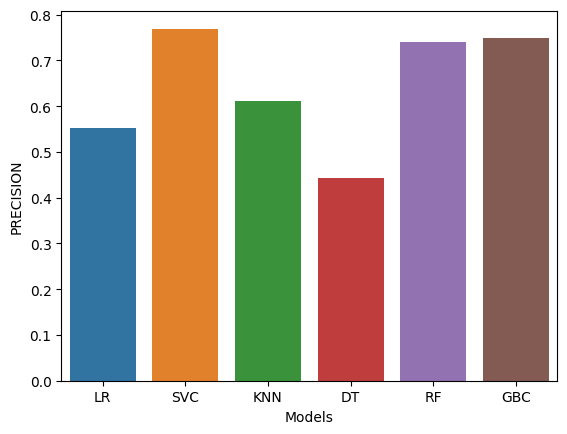

In [279]:
sns.barplot(x='Models', y='PRECISION', data=final_data)
plt.show()

In [193]:
#Final - Recall Score
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'RECALL':[recall_score(Y_test,y_pred1),
                                  recall_score(Y_test,y_pred2),
                                  recall_score(Y_test,y_pred3),
                                  recall_score(Y_test,y_pred4),
                                  recall_score(Y_test,y_pred5),
                                  recall_score(Y_test,y_pred6)]})

In [194]:
#Final - F1 Score
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'F1':[f1_score(Y_test,y_pred1),
                                  f1_score(Y_test,y_pred2),
                                  f1_score(Y_test,y_pred3),
                                  f1_score(Y_test,y_pred4),
                                  f1_score(Y_test,y_pred5),
                                  f1_score(Y_test,y_pred6)]})

# TRAIN AND LOAD THE BEST MODEL

In [280]:
#train our best model
X_res = sc.fit_transform(x_res)

In [281]:

rf.fit(X_res,y_res)

RandomForestClassifier()

In [282]:
#save the model
import joblib
joblib.dump(rf,'churn_prdict_model')


['churn_prdict_model']

In [283]:
# To load the saved model
model = joblib.load('churn_prdict_model')


# Use the model to predict

In [284]:
df_final.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [285]:
# Use the model to predict(as per above columns,put the values below)
model.predict([[350,35,1,0.0,0,0,0,101348.88,0,0,1]])

array([1])